In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
office = pd.read_csv('office.csv')
office.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17vid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17vid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [3]:
!pip install nltk



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 13.0 MB/s  0:00:00

   ---------------------------------------- 0/2 [regex]
   ---------------------------------------- 0/2 [regex]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ----

In [7]:
season4 = office[office['season'] == 4].copy()
season4.shape


(5642, 7)

PART 2 Top 10 Characters in Season 4

If you’ve ever wondered who actually runs Season 4, this settles it. Counting lines isn’t glamorous, but it tells you exactly whose voice dominates the season.

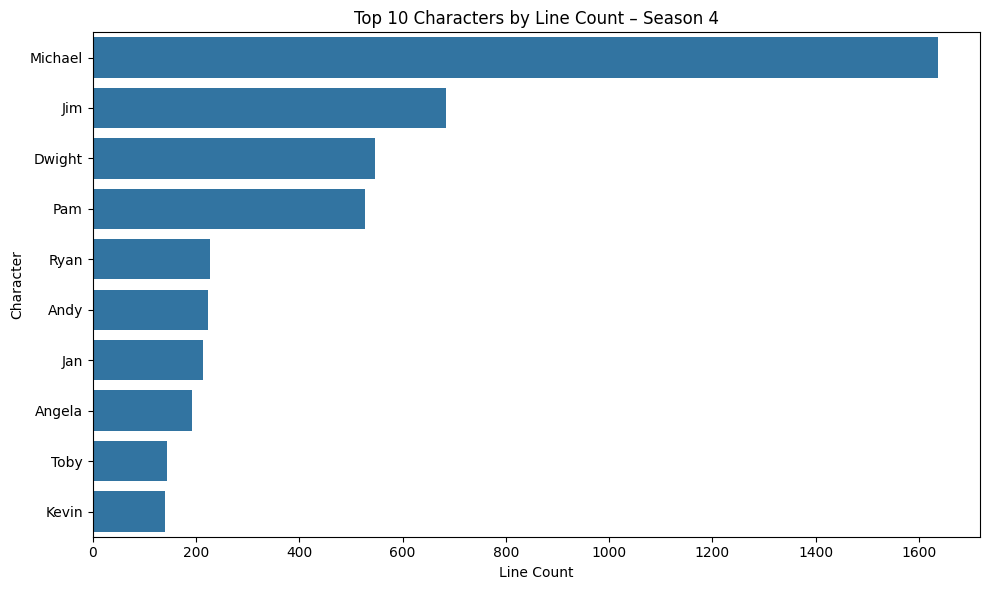

In [8]:
top_chars = (
    season4.groupby('speaker')
    .size()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10,6))
sns.barplot(x=top_chars.values, y=top_chars.index)
plt.title('Top 10 Characters by Line Count – Season 4')
plt.xlabel('Line Count')
plt.ylabel('Character')
plt.tight_layout()
plt.show()


Season 4 really doesn’t pretend to be an ensemble show. Michael basically steamrolls everyone in sheer volume, Jim follows as the resident commentary machine, and Dwight + Pam close out the core four. Everyone else is fighting for scraps. The plot pretty much confirms what we already know: a handful of characters carry the entire season while the rest orbit around their chaos.

PART 3
Season 4 is now getting taken apart word by word. This step looks messy, but it is the only way to stop relying on vibes and start looking at the actual language patterns. Once every line is broken into individual tokens, everything else in the assignment becomes possible.

In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17vid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\17vid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17vid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import string
from nltk.tokenize import word_tokenize
text_df = season4[['line_text']].dropna().copy()
text_df['tokens'] = text_df['line_text'].apply(lambda x: word_tokenize(x.lower()))
text_df['tokens'] = text_df['tokens'].apply(lambda w: [t for t in w if t not in string.punctuation])
exploded = text_df.explode('tokens')
exploded.head()


,line_text,tokens
16971,"Ok, well I did not get the job in New York, bu...",ok
16971,"Ok, well I did not get the job in New York, bu...",well
16971,"Ok, well I did not get the job in New York, bu...",i
16971,"Ok, well I did not get the job in New York, bu...",did
16971,"Ok, well I did not get the job in New York, bu...",not


Now that we have every single word on its own row, we can finally see what Season 4 actually sounds like. The raw frequency list is usually a disaster because filler words hog the spotlight, but we let it embarrass itself first before cleaning it up.

In [12]:
from collections import Counter
unigram_counts = Counter(exploded['tokens'])
unigram_counts.most_common(10)


[('i', 2880),
 ('you', 2357),
 ('the', 1712),
 ('to', 1651),
 ('a', 1476),
 ('it', 1304),
 ("'s", 1292),
 ('and', 1198),
 ('that', 1077),
 ('do', 884)]

This list has almost zero analytical value. It is mostly filler words that show up in every sentence ever written. Nothing here tells us anything about the season itself.

In [13]:
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
clean_words = exploded[~exploded['tokens'].isin(stops)]
clean_counts = Counter(clean_words['tokens'])
clean_counts.most_common(10)


[("'s", 1292),
 ('...', 806),
 ("n't", 772),
 ("'m", 471),
 ('know', 431),
 ('michael', 362),
 ("'re", 343),
 ('oh', 338),
 ('like', 320),
 ('yeah', 283)]

With stopwords out of the way, the season starts to show its real vocabulary. These words reflect choices that characters actually make rather than grammatical filler.

In [14]:
def make_bigrams(tokens):
    return list(zip(tokens[:-1], tokens[1:]))
bigram_df = text_df.copy()
bigram_df['bigrams'] = bigram_df['tokens'].apply(make_bigrams)
bigram_exploded = bigram_df.explode('bigrams').dropna(subset=['bigrams'])
bigram_counts = Counter(bigram_exploded['bigrams'])
bigram_counts.most_common(10)


[(('i', "'m"), 470),
 (('do', "n't"), 396),
 (('it', "'s"), 381),
 (('i', 'do'), 243),
 (('that', "'s"), 209),
 (('you', 'know'), 191),
 (('you', "'re"), 188),
 (('and', 'i'), 182),
 (('in', 'the'), 166),
 (('this', 'is'), 163)]

Unigrams look at single words. Bigrams look at word pairs. Unigrams show the ingredients, but bigrams show the patterns. Bigrams reveal how characters actually form thoughts, and they give a much clearer view of recurring themes and relationships.

PART 5

In [16]:
!pip install wordcloud



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


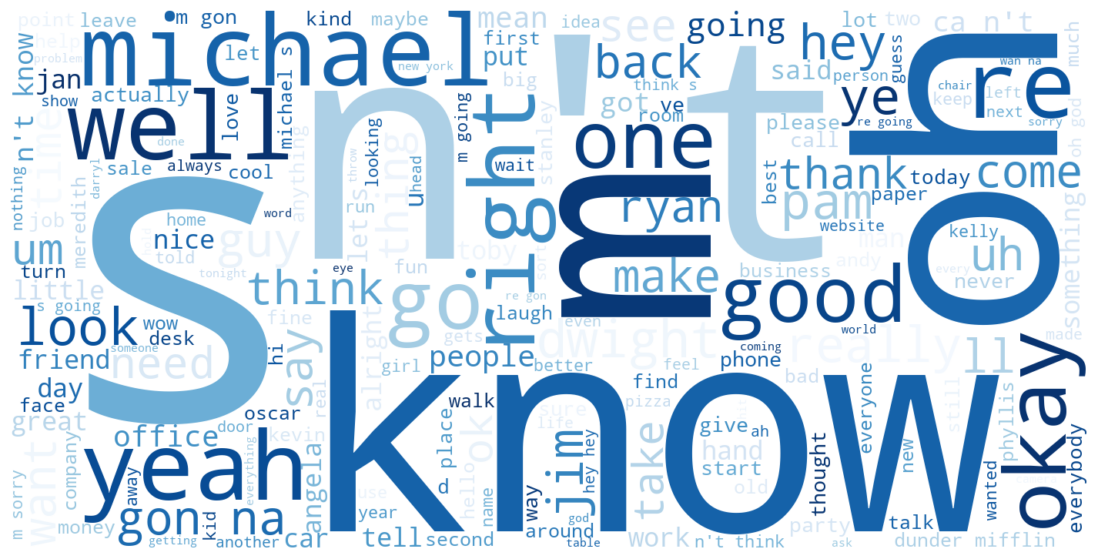

In [21]:
wc_office = WordCloud(
    width=1400,
    height=700,
    background_color='white',
    colormap='Blues',
    prefer_horizontal=0.8,
    max_words=200
).generate(all_words)
plt.figure(figsize=(14,7))
plt.imshow(wc_office, interpolation='bilinear')
plt.axis('off')
plt.show()





The word cloud gives a quick visual snapshot of how Season 4 sounds, using a theme that matches the Dunder Mifflin paper company with blue and white accents. The larger words reflect the habits and phrases characters rely on the most, which makes this an easy way to see the season’s overall personality without reading every line. It is not meant to be a deep analytical tool, but it does reveal which ideas and names dominate the dialogue once the stopwords are removed.

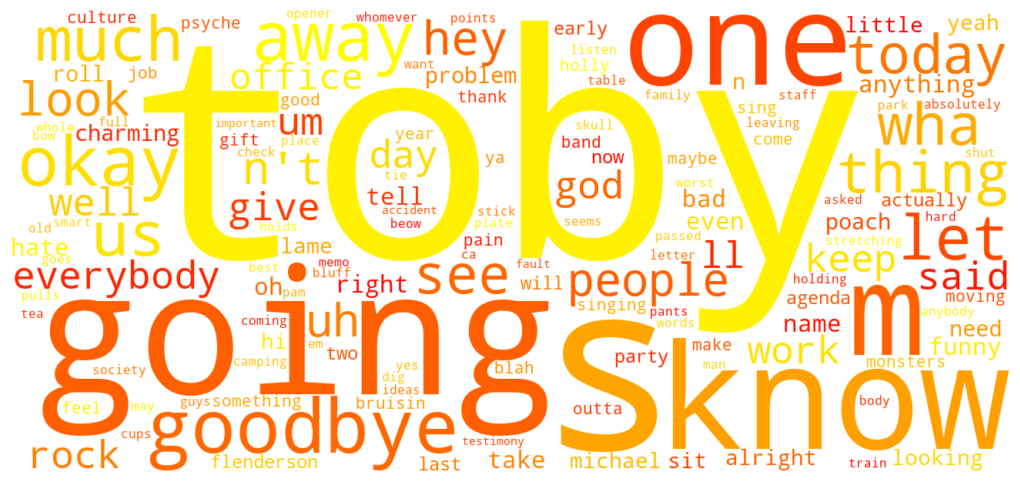

In [18]:
michael_toby = season4[
    (season4['speaker'] == 'Michael') &
    (season4['line_text'].str.contains('Toby', case=False, na=False))
]
toby_words = ' '.join(
    ' '.join(word_tokenize(line.lower()))
    for line in michael_toby['line_text']
)
wc_toby = WordCloud(
    width=1300,
    height=600,
    background_color='white',
    colormap='autumn',
    prefer_horizontal=1,
    max_words=150,
    contour_width=2,
    contour_color='firebrick'
).generate(toby_words)
plt.figure(figsize=(14,6))
plt.imshow(wc_toby, interpolation='bilinear')
plt.axis('off')
plt.show()


I also created a second word cloud for my own practice. This one focuses specifically on lines where Michael talks about Toby. It is not part of the formal assignment, but it was a fun way to explore how filtering, tokenising, and visualising targeted subsets of dialogue can highlight specific character dynamics. Michael’s talent for insulting Toby is almost its own dataset, so turning it into a word cloud felt appropriate and satisfying.

PART 6

In [23]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\17vid\AppData\Roaming\nltk_data...


True

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
season4['sentiment'] = season4['line_text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])


In [26]:
def word_level_scores(text):
    words = word_tokenize(text.lower())
    return {w: sia.polarity_scores(w)['compound'] for w in words}
scores = []
for line in season4['line_text'].astype(str):
    s = word_level_scores(line)
    scores.extend(list(s.items()))
sent_df = pd.DataFrame(scores, columns=['word', 'score'])


In [27]:
sent_df = sent_df.groupby('word')['score'].mean().reset_index()
sent_df = sent_df.sort_values('score', ascending=False)
top_positive = sent_df.head(10)
top_negative = sent_df.tail(10)


In [28]:
top_positive, top_negative


(           word   score
 3847   paradise  0.6369
 2243    freedom  0.6369
 3923  perfectly  0.6369
 2514   happiest  0.6369
 2417   greatest  0.6369
 695        best  0.6369
 3209       love  0.6369
 2945     joyous  0.6249
 2416      great  0.6249
 540     awesome  0.6249,
           word   score
 1936      evil -0.6597
 2997   killing -0.6597
 3510  murdered -0.6597
 5515   tragedy -0.6597
 1599     devil -0.6597
 2995    killed -0.6705
 3511  murderer -0.6808
 2569      hell -0.6808
 2994      kill -0.6908
 3509    murder -0.6908)

The lists show the words that have the strongest emotional weight in Season 4. The positive list highlights language linked with light moments and encouragement, while the negative list captures words tied to conflict, tension, or the usual office disasters. Together they sketch out the emotional range of the season without needing to manually review every scene.

PART 7

In [29]:
!pip install transformers


   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.0 MB 16.4 MB/s eta 0:00:01
   --------------------- ------------------ 6.6/12.0 MB 17.4 MB/s eta 0:00:01
   ---------------------------------- ----- 10.5/12.0 MB 17.7 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 16.7 MB/s  0:00:00
   ---------------------------------------- 0.0/566.1 kB ? eta -:--:--
   ---------------------------------------- 566.1/566.1 kB 9.9 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 15.7 MB/s  0:00:00

   ---------------------------------------- 0/4 [safetensors]
   ---------- ----------------------------- 1/4 [huggingface-hub]
   ---------- ----------------------------- 1/4 [huggingface-hub]
   ---------- ----------------------------- 1/4 [huggingface-hub]
   ---------- ----------------------------- 1/4 [huggingface-hub]
 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from transformers import pipeline
emotion_model = pipeline(
    "text-classification",
    model="SamLowe/roberta-base-go_emotions",
    top_k=1
)


Device set to use cpu


In [55]:
def get_emotions_batch(texts, batch_size=16):
    results = []
    total = len(texts)
    for i in range(0, total, batch_size):
        batch = [str(t) for t in texts[i:i+batch_size]]
        out = emotion_model(batch)
        for item in out:
            if isinstance(item, list) and len(item) > 0:
                item = item[0]
            results.append(item['label'])
    return results


In [56]:
season4['emotion'] = get_emotions_batch(season4['line_text'].tolist())


In [57]:
emotion_counts = season4['emotion'].value_counts().head(5)
emotion_counts


emotion
neutral        2894
curiosity       621
approval        398
admiration      324
disapproval     247
Name: count, dtype: int64

The emotion distribution shows that neutral language dominates Season 4, which fits the style of the show since most conversations are casual office chatter that moves the story along without strong emotional swings. Curiosity appears frequently because characters ask questions, challenge each other, or try to figure out what is happening in typical workplace chaos. Approval and admiration reflect lighter moments, especially when characters support each other or react positively in group settings. Disapproval also shows up enough to capture the awkward or tense exchanges that happen throughout the season.Compared with the earlier sentiment analysis, these results highlight why emotion classification adds clarity. Sentiment compresses everything into a single score, while emotion detection separates reactions into specific categories. This makes the emotional pattern of the season easier to understand since we can see which emotions actually drive the dialogue rather than guessing from polarity alone.